In [9]:
#Importing Libraries
import numpy as np #NumPy is a general-purpose array-processing package.
import pandas as pd #It contains high-level data structures and manipulation tools designed to make data analysis fast and easy.
import matplotlib.pyplot as plt #It is a Plotting Library
import seaborn as sns #Seaborn is a Python data visualization library based on matplotlib.
from sklearn.model_selection import train_test_split #Splitting of Dataset 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
import time 
import datetime 
from sklearn import metrics
from sklearn import linear_model 

In [10]:
#Reading the csv file
data_sm = pd.read_csv('C:/Users/hp/Downloads/new data.csv/NEW DATA.csv',sep=' ')

In [11]:
data_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 24 columns):
1:Date                             2764 non-null object
2:Time                             2764 non-null object
3:Temperature_Comedor_Sensor       2764 non-null float64
4:Temperature_Habitacion_Sensor    2764 non-null float64
5:Weather_Temperature              2764 non-null float64
6:CO2_Comedor_Sensor               2764 non-null float64
7:CO2_Habitacion_Sensor            2764 non-null float64
8:Humedad_Comedor_Sensor           2764 non-null float64
9:Humedad_Habitacion_Sensor        2764 non-null float64
10:Lighting_Comedor_Sensor         2764 non-null float64
11:Lighting_Habitacion_Sensor      2764 non-null float64
12:Precipitacion                   2764 non-null float64
13:Meteo_Exterior_Crepusculo       2764 non-null float64
14:Meteo_Exterior_Viento           2764 non-null float64
15:Meteo_Exterior_Sol_Oest         2764 non-null float64
16:Meteo_Exterior_Sol_Est          2764 

In [12]:
#Describing data
data_sm.describe()

,3:Temperature_Comedor_Sensor,4:Temperature_Habitacion_Sensor,5:Weather_Temperature,6:CO2_Comedor_Sensor,7:CO2_Habitacion_Sensor,8:Humedad_Comedor_Sensor,9:Humedad_Habitacion_Sensor,10:Lighting_Comedor_Sensor,11:Lighting_Habitacion_Sensor,12:Precipitacion,...,15:Meteo_Exterior_Sol_Oest,16:Meteo_Exterior_Sol_Est,17:Meteo_Exterior_Sol_Sud,18:Meteo_Exterior_Piranometro,19:Exterior_Entalpic_1,20:Exterior_Entalpic_2,21:Exterior_Entalpic_turbo,22:Temperature_Exterior_Sensor,23:Humedad_Exterior_Sensor,24:Day_Of_Week
count,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,...,2764.000000,2764.000000,2764.000000,2764.000000,2764.0,2764.0,2764.0,2764.000000,2764.000000,2764.000000
mean,19.199722,18.824852,13.897396,208.479123,211.065844,44.878420,47.321220,26.745381,40.732571,0.047033,...,14936.617682,12248.000148,22047.525813,215.010017,0.0,0.0,0.0,16.757847,55.981988,3.954438
std,2.853315,2.821178,4.171991,27.032686,28.469144,6.587440,7.557795,23.298441,42.326087,0.206705,...,25964.049455,21758.550527,32709.387051,297.234046,0.0,0.0,0.0,3.885869,13.019610,1.991799
min,11.352000,11.076000,0.000000,187.339000,188.907000,27.084000,29.594700,10.740000,11.328000,0.000000,...,0.000000,0.000000,0.000000,-4.164670,0.0,0.0,0.0,9.223330,22.260700,1.000000
25%,17.450800,17.060350,10.783325,200.893250,202.682750,40.351975,42.531325,11.588700,13.265300,0.000000,...,0.000000,0.000000,0.000000,-3.381330,0.0,0.0,0.0,13.662025,46.430675,2.000000
50%,19.373650,19.021000,15.000000,207.045500,209.408000,45.434650,47.534700,11.801300,17.690000,0.000000,...,0.000000,0.000000,0.000000,3.922000,0.0,0.0,0.0,16.490350,57.477350,4.000000
75%,21.229975,20.828700,16.666700,211.245500,213.218750,49.352675,52.685975,31.224000,52.057350,0.000000,...,15088.000000,11131.275000,38736.575000,435.434500,0.0,0.0,0.0,19.397800,65.649325,6.000000
max,25.540000,24.944000,26.000000,594.389000,609.237000,60.957300,62.594700,110.693000,162.965000,1.000000,...,95278.400000,85535.400000,95704.400000,1028.270000,0.0,0.0,0.0,29.908000,83.805300,7.000000


In [26]:
data_sm.head(10)

,1:Date,2:Time,3:Temperature_Comedor_Sensor,4:Temperature_Habitacion_Sensor,5:Weather_Temperature,6:CO2_Comedor_Sensor,7:CO2_Habitacion_Sensor,8:Humedad_Comedor_Sensor,9:Humedad_Habitacion_Sensor,10:Lighting_Comedor_Sensor,...,15:Meteo_Exterior_Sol_Oest,16:Meteo_Exterior_Sol_Est,17:Meteo_Exterior_Sol_Sud,18:Meteo_Exterior_Piranometro,19:Exterior_Entalpic_1,20:Exterior_Entalpic_2,21:Exterior_Entalpic_turbo,22:Temperature_Exterior_Sensor,23:Humedad_Exterior_Sensor,24:Day_Of_Week
0,13/03/2012,11:45,18.1875,17.8275,0.0,216.560,221.920,39.9125,42.4150,81.6650,...,9690.24,12604.20,95436.8,758.880,0,0,0,18.1150,48.3750,2.0
1,13/03/2012,12:00,18.4633,18.1207,6.8,219.947,220.363,39.9267,42.2453,81.7413,...,11022.00,10787.20,95436.8,762.069,0,0,0,18.4147,47.8080,2.0
2,13/03/2012,12:15,18.7673,18.4367,17.0,219.403,218.933,39.7720,42.2267,81.4240,...,13960.50,9669.63,95398.6,766.251,0,0,0,18.8533,47.4320,2.0
3,13/03/2012,12:30,19.0727,18.7513,18.0,218.613,217.045,39.7760,42.0987,81.5013,...,18511.20,9648.13,95360.3,766.037,0,0,0,19.2907,47.0240,2.0
4,13/03/2012,12:45,19.3721,19.0414,20.0,217.714,216.080,39.7757,42.0686,81.4657,...,26349.00,9208.32,95354.9,762.743,0,0,0,19.7400,45.4743,2.0
5,13/03/2012,13:00,19.6407,19.2773,20.0,218.389,216.011,39.8107,42.0347,81.2427,...,36511.70,8694.78,95354.9,752.683,0,0,0,20.1660,45.5467,2.0
6,13/03/2012,13:15,19.9120,19.5367,20.0,218.155,215.829,39.8613,41.9947,81.3600,...,49288.50,8501.25,95354.9,740.949,0,0,0,20.5660,44.9680,2.0
7,13/03/2012,13:30,20.1640,19.7307,20.0,216.661,215.296,39.8240,41.9947,81.0240,...,62253.70,8687.62,95174.7,721.109,0,0,0,20.8427,45.1813,2.0
8,13/03/2012,13:45,20.4120,19.9693,20.0,217.461,214.549,39.9587,42.1253,81.1040,...,71453.40,8888.32,91848.7,699.392,0,0,0,21.2040,45.4160,2.0
9,13/03/2012,14:00,20.6400,20.1407,20.0,215.349,213.909,39.9400,42.0427,81.1813,...,80076.80,9046.02,87217.5,677.675,0,0,0,21.5227,45.0213,2.0


In [29]:
data_sm.tail(10)

,1:Date,2:Time,3:Temperature_Comedor_Sensor,4:Temperature_Habitacion_Sensor,5:Weather_Temperature,6:CO2_Comedor_Sensor,7:CO2_Habitacion_Sensor,8:Humedad_Comedor_Sensor,9:Humedad_Habitacion_Sensor,10:Lighting_Comedor_Sensor,...,15:Meteo_Exterior_Sol_Oest,16:Meteo_Exterior_Sol_Est,17:Meteo_Exterior_Sol_Sud,18:Meteo_Exterior_Piranometro,19:Exterior_Entalpic_1,20:Exterior_Entalpic_2,21:Exterior_Entalpic_turbo,22:Temperature_Exterior_Sensor,23:Humedad_Exterior_Sensor,24:Day_Of_Week
2754,11/04/2012,04:15,21.6747,21.3040,15.0000,189.995,191.307,41.2133,41.4773,11.5073,...,0.00,0.00,0.000,-3.70800,0,0,0,17.5033,48.2000,3.0
2755,11/04/2012,04:30,21.5653,21.2160,15.0000,189.227,192.011,41.2667,41.5493,11.5240,...,0.00,0.00,0.000,-3.44667,0,0,0,17.3287,48.5280,3.0
2756,11/04/2012,04:45,21.4760,21.1093,15.0000,190.240,191.915,41.3120,41.5920,11.5073,...,0.00,0.00,0.000,-3.70800,0,0,0,17.1620,48.2320,3.0
2757,11/04/2012,05:00,21.3627,21.0013,15.0000,190.464,192.032,41.2907,41.6560,11.5240,...,0.00,0.00,0.000,-3.51200,0,0,0,17.0273,48.2293,3.0
2758,11/04/2012,05:15,21.2560,20.8960,13.6667,190.304,192.000,41.2427,41.6800,11.6053,...,0.00,0.00,0.000,-3.70800,0,0,0,16.8380,48.8693,3.0
2759,11/04/2012,05:30,21.1520,20.8187,13.0000,190.539,192.181,41.3120,41.6880,11.4427,...,0.00,0.00,0.000,-3.43400,0,0,0,16.6180,49.2960,3.0
2760,11/04/2012,05:45,21.0413,20.7053,12.1333,190.421,193.067,41.3173,41.7200,11.6867,...,465.92,2716.67,523.264,3.85200,0,0,0,16.4013,50.0373,3.0
2761,11/04/2012,06:00,20.9347,20.5827,12.0000,190.432,193.653,41.3333,41.7573,19.5387,...,3454.98,16203.80,3347.460,26.83000,0,0,0,16.2607,50.0587,3.0
2762,11/04/2012,06:15,20.8560,20.5200,12.0000,191.531,193.387,41.3093,41.8107,20.9853,...,6795.26,38303.10,7110.660,66.94930,0,0,0,16.2367,49.8400,3.0
2763,11/04/2012,06:30,20.7627,20.4400,12.1333,191.563,193.664,41.2800,41.8373,20.5620,...,8952.83,51347.50,10270.700,112.26700,0,0,0,16.2860,50.2987,3.0


In [30]:
#Rounding off the DataFrame for better accuracy 
data_sm.round(decimals=6)

,1:Date,2:Time,3:Temperature_Comedor_Sensor,4:Temperature_Habitacion_Sensor,5:Weather_Temperature,6:CO2_Comedor_Sensor,7:CO2_Habitacion_Sensor,8:Humedad_Comedor_Sensor,9:Humedad_Habitacion_Sensor,10:Lighting_Comedor_Sensor,...,15:Meteo_Exterior_Sol_Oest,16:Meteo_Exterior_Sol_Est,17:Meteo_Exterior_Sol_Sud,18:Meteo_Exterior_Piranometro,19:Exterior_Entalpic_1,20:Exterior_Entalpic_2,21:Exterior_Entalpic_turbo,22:Temperature_Exterior_Sensor,23:Humedad_Exterior_Sensor,24:Day_Of_Week
0,13/03/2012,11:45,18.1875,17.8275,0.0000,216.560,221.920,39.9125,42.4150,81.6650,...,9690.24,12604.20,95436.800,758.8800,0,0,0,18.1150,48.3750,2.0
1,13/03/2012,12:00,18.4633,18.1207,6.8000,219.947,220.363,39.9267,42.2453,81.7413,...,11022.00,10787.20,95436.800,762.0690,0,0,0,18.4147,47.8080,2.0
2,13/03/2012,12:15,18.7673,18.4367,17.0000,219.403,218.933,39.7720,42.2267,81.4240,...,13960.50,9669.63,95398.600,766.2510,0,0,0,18.8533,47.4320,2.0
3,13/03/2012,12:30,19.0727,18.7513,18.0000,218.613,217.045,39.7760,42.0987,81.5013,...,18511.20,9648.13,95360.300,766.0370,0,0,0,19.2907,47.0240,2.0
4,13/03/2012,12:45,19.3721,19.0414,20.0000,217.714,216.080,39.7757,42.0686,81.4657,...,26349.00,9208.32,95354.900,762.7430,0,0,0,19.7400,45.4743,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2759,11/04/2012,05:30,21.1520,20.8187,13.0000,190.539,192.181,41.3120,41.6880,11.4427,...,0.00,0.00,0.000,-3.4340,0,0,0,16.6180,49.2960,3.0
2760,11/04/2012,05:45,21.0413,20.7053,12.1333,190.421,193.067,41.3173,41.7200,11.6867,...,465.92,2716.67,523.264,3.8520,0,0,0,16.4013,50.0373,3.0
2761,11/04/2012,06:00,20.9347,20.5827,12.0000,190.432,193.653,41.3333,41.7573,19.5387,...,3454.98,16203.80,3347.460,26.8300,0,0,0,16.2607,50.0587,3.0
2762,11/04/2012,06:15,20.8560,20.5200,12.0000,191.531,193.387,41.3093,41.8107,20.9853,...,6795.26,38303.10,7110.660,66.9493,0,0,0,16.2367,49.8400,3.0


# Functions

In [36]:
def value_count(smldata):
    value_count = smldata.value_counts()
    return value_count

def date_2_time_stamp(string):
  return time.mktime(datetime.datetime.strptime(string,"%d/%m/%Y").timetuple()) 



 # Data Visualisation

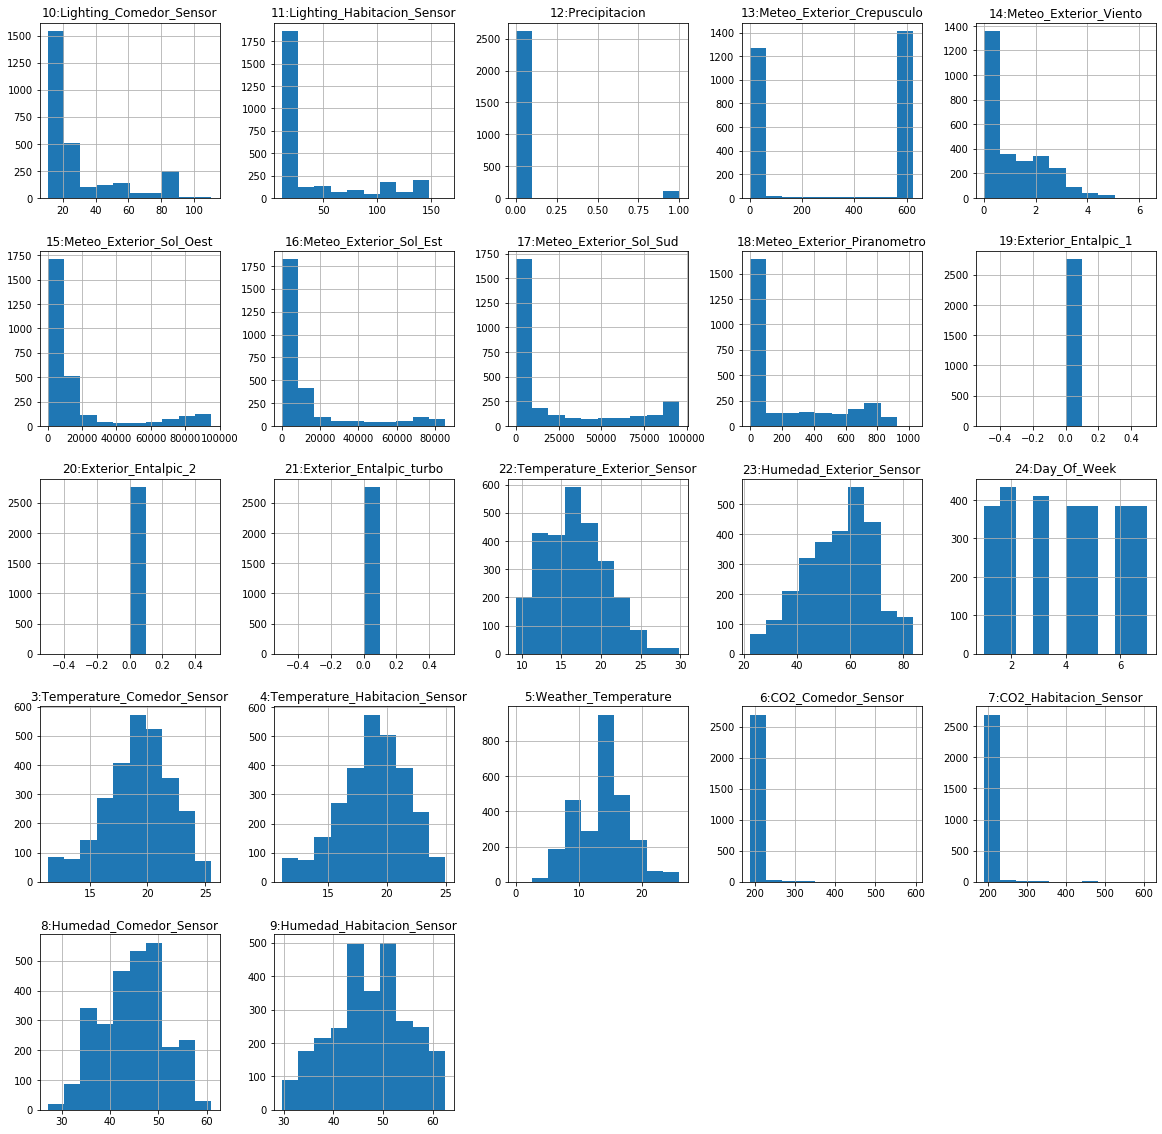

In [35]:
#Histogram of all the columns to understand the distribution
data_sm.hist(figsize=(20,20));

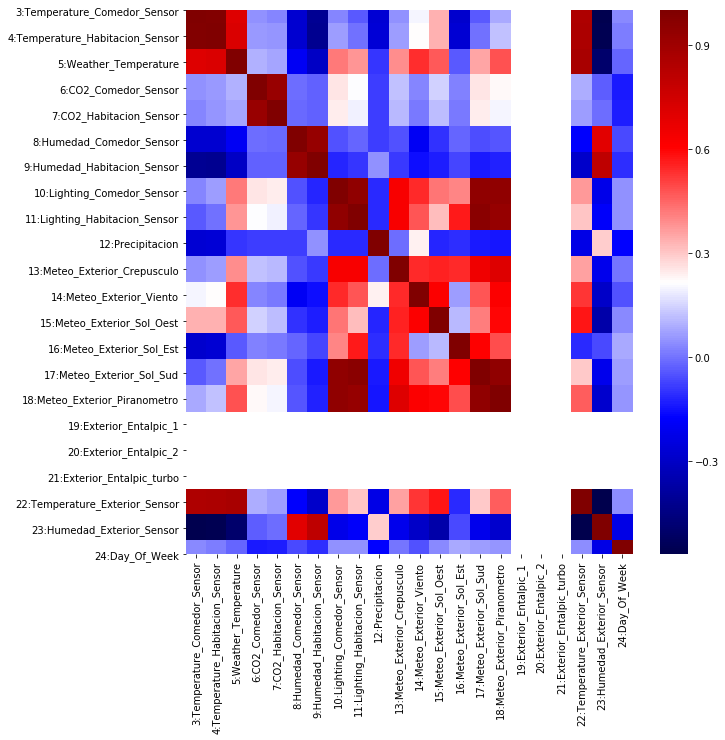

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(data=data_sm.corr(),cmap="seismic")
plt.show();

# Data PreProcessing

In [46]:
#Finding unique values of each column
column_lengths = len(data_sm.columns)
unique_values= dict()
col_values=list()
for j in range(column_lengths):
    col_values.append(data_sm[data_sm.columns[j]])
    
for i in range(column_lengths):
    values=col_values[i]
    unique_values["Unique Values in Column {}:".format(i)] = values.unique()
   
    

In [47]:
unique_values

{'Unique Values in Column 0:': array(['13/03/2012', '14/03/2012', '15/03/2012', '16/03/2012',
        '17/03/2012', '18/03/2012', '19/03/2012', '20/03/2012',
        '21/03/2012', '22/03/2012', '23/03/2012', '24/03/2012',
        '25/03/2012', '26/03/2012', '27/03/2012', '28/03/2012',
        '29/03/2012', '30/03/2012', '31/03/2012', '01/04/2012',
        '02/04/2012', '03/04/2012', '04/04/2012', '05/04/2012',
        '06/04/2012', '07/04/2012', '08/04/2012', '09/04/2012',
        '10/04/2012', '11/04/2012'], dtype=object),
 'Unique Values in Column 1:': array(['11:45', '12:00', '12:15', '12:30', '12:45', '13:00', '13:15',
        '13:30', '13:45', '14:00', '14:15', '14:30', '14:45', '15:00',
        '15:15', '15:30', '15:45', '16:00', '16:15', '16:30', '16:45',
        '17:00', '17:15', '17:30', '17:45', '18:00', '18:15', '18:30',
        '18:45', '19:00', '19:15', '19:30', '19:45', '20:00', '20:15',
        '20:30', '20:45', '21:00', '21:15', '21:30', '21:45', '22:00',
        '22:15

In [50]:
#Checking for null values
data_sm.isnull().sum()

1:Date                             0
2:Time                             0
3:Temperature_Comedor_Sensor       0
4:Temperature_Habitacion_Sensor    0
5:Weather_Temperature              0
6:CO2_Comedor_Sensor               0
7:CO2_Habitacion_Sensor            0
8:Humedad_Comedor_Sensor           0
9:Humedad_Habitacion_Sensor        0
10:Lighting_Comedor_Sensor         0
11:Lighting_Habitacion_Sensor      0
12:Precipitacion                   0
13:Meteo_Exterior_Crepusculo       0
14:Meteo_Exterior_Viento           0
15:Meteo_Exterior_Sol_Oest         0
16:Meteo_Exterior_Sol_Est          0
17:Meteo_Exterior_Sol_Sud          0
18:Meteo_Exterior_Piranometro      0
19:Exterior_Entalpic_1             0
20:Exterior_Entalpic_2             0
21:Exterior_Entalpic_turbo         0
22:Temperature_Exterior_Sensor     0
23:Humedad_Exterior_Sensor         0
24:Day_Of_Week                     0
dtype: int64

In [53]:
#Checking for Nan Values
data_sm.isna().sum()

1:Date                             0
2:Time                             0
3:Temperature_Comedor_Sensor       0
4:Temperature_Habitacion_Sensor    0
5:Weather_Temperature              0
6:CO2_Comedor_Sensor               0
7:CO2_Habitacion_Sensor            0
8:Humedad_Comedor_Sensor           0
9:Humedad_Habitacion_Sensor        0
10:Lighting_Comedor_Sensor         0
11:Lighting_Habitacion_Sensor      0
13:Meteo_Exterior_Crepusculo       0
14:Meteo_Exterior_Viento           0
15:Meteo_Exterior_Sol_Oest         0
16:Meteo_Exterior_Sol_Est          0
17:Meteo_Exterior_Sol_Sud          0
18:Meteo_Exterior_Piranometro      0
22:Temperature_Exterior_Sensor     0
23:Humedad_Exterior_Sensor         0
24:Day_Of_Week                     0
dtype: int64

In [54]:
#Dropping Empty Columns
# Column 18 19 20 has array[0] which says motor is off most of the time and column 11 has 95% values as 0 so we drop them.
data_sm = data_sm.drop(data_sm.columns[[11, 18, 19, 20]], axis=1)
data_sm

IndexError: index 20 is out of bounds for axis 0 with size 20

In [55]:
#length of columns
len(data_sm.columns)

20

In [371]:
#Counting no.of non-zero elements and total elements of the DatafRame
print(np.count_nonzero(data_sm))
print(data_sm.size)


50622
55280


In [372]:
#Counting non-zero elements of each column
np.count_nonzero(data_sm, axis=0)

array([2764, 2764, 2764, 2764, 2763, 2764, 2764, 2764, 2764, 2764, 2764,
       2764, 2291, 1368, 1376, 1365, 2763, 2764, 2764, 2764], dtype=int64)

In [373]:
#Average of Room and dining room columns
data_sm['Indoor Temperature'] = data_sm.iloc[:,[2,3]].mean(axis=1)
data_sm['CO2 in ppm'] = data_sm.iloc[:,[5,6]].mean(axis=1)
data_sm['Relative Humidity'] = data_sm.iloc[:,[7,8]].mean(axis=1)
data_sm['Lighting'] = data_sm.iloc[:,[9,10]].mean(axis=1)
data_sm['Sunlight'] = data_sm.iloc[:,[14,15,16]].mean(axis=1)

data_sm

,1:Date,2:Time,3:Temperature_Comedor_Sensor,4:Temperature_Habitacion_Sensor,5:Weather_Temperature,6:CO2_Comedor_Sensor,7:CO2_Habitacion_Sensor,8:Humedad_Comedor_Sensor,9:Humedad_Habitacion_Sensor,10:Lighting_Comedor_Sensor,...,17:Meteo_Exterior_Sol_Sud,18:Meteo_Exterior_Piranometro,22:Temperature_Exterior_Sensor,23:Humedad_Exterior_Sensor,24:Day_Of_Week,Indoor Temperature,CO2 in ppm,Relative Humidity,Lighting,Sunlight
0,13/03/2012,11:45,18.1875,17.8275,0.0000,216.560,221.920,39.9125,42.4150,81.6650,...,95436.800,758.8800,18.1150,48.3750,2.0,18.00750,219.2400,41.16375,97.59250,36266.626667
1,13/03/2012,12:00,18.4633,18.1207,6.8000,219.947,220.363,39.9267,42.2453,81.7413,...,95436.800,762.0690,18.4147,47.8080,2.0,18.29200,220.1550,41.08600,97.67315,35662.023000
2,13/03/2012,12:15,18.7673,18.4367,17.0000,219.403,218.933,39.7720,42.2267,81.4240,...,95398.600,766.2510,18.8533,47.4320,2.0,18.60200,219.1680,40.99935,97.51200,35278.160333
3,13/03/2012,12:30,19.0727,18.7513,18.0000,218.613,217.045,39.7760,42.0987,81.5013,...,95360.300,766.0370,19.2907,47.0240,2.0,18.91200,217.8290,40.93735,97.42265,35258.155667
4,13/03/2012,12:45,19.3721,19.0414,20.0000,217.714,216.080,39.7757,42.0686,81.4657,...,95354.900,762.7430,19.7400,45.4743,2.0,19.20675,216.8970,40.92215,97.24985,35108.654333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2759,11/04/2012,05:30,21.1520,20.8187,13.0000,190.539,192.181,41.3120,41.6880,11.4427,...,0.000,-3.4340,16.6180,49.2960,3.0,20.98535,191.3600,41.50000,12.19135,-1.144667
2760,11/04/2012,05:45,21.0413,20.7053,12.1333,190.421,193.067,41.3173,41.7200,11.6867,...,523.264,3.8520,16.4013,50.0373,3.0,20.87330,191.7440,41.51865,15.50335,1081.262000
2761,11/04/2012,06:00,20.9347,20.5827,12.0000,190.432,193.653,41.3333,41.7573,19.5387,...,3347.460,26.8300,16.2607,50.0587,3.0,20.75870,192.0425,41.54530,21.39070,6526.030000
2762,11/04/2012,06:15,20.8560,20.5200,12.0000,191.531,193.387,41.3093,41.8107,20.9853,...,7110.660,66.9493,16.2367,49.8400,3.0,20.68800,192.4590,41.56000,22.21265,15160.236433


In [374]:
#Dropping Columns
data_sm = data_sm.drop(data_sm.columns[[2, 3, 5, 6, 7, 8, 9, 10, 13, 14, 15, 16 ]], axis=1)
data_sm

,1:Date,2:Time,5:Weather_Temperature,13:Meteo_Exterior_Crepusculo,14:Meteo_Exterior_Viento,22:Temperature_Exterior_Sensor,23:Humedad_Exterior_Sensor,24:Day_Of_Week,Indoor Temperature,CO2 in ppm,Relative Humidity,Lighting,Sunlight
0,13/03/2012,11:45,0.0000,623.360,1.426250,18.1150,48.3750,2.0,18.00750,219.2400,41.16375,97.59250,36266.626667
1,13/03/2012,12:00,6.8000,623.211,1.592000,18.4147,47.8080,2.0,18.29200,220.1550,41.08600,97.67315,35662.023000
2,13/03/2012,12:15,17.0000,622.656,1.891330,18.8533,47.4320,2.0,18.60200,219.1680,40.99935,97.51200,35278.160333
3,13/03/2012,12:30,18.0000,622.571,1.828000,19.2907,47.0240,2.0,18.91200,217.8290,40.93735,97.42265,35258.155667
4,13/03/2012,12:45,20.0000,622.400,2.360710,19.7400,45.4743,2.0,19.20675,216.8970,40.92215,97.24985,35108.654333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2759,11/04/2012,05:30,13.0000,392.603,0.074667,16.6180,49.2960,3.0,20.98535,191.3600,41.50000,12.19135,-1.144667
2760,11/04/2012,05:45,12.1333,613.120,0.000000,16.4013,50.0373,3.0,20.87330,191.7440,41.51865,15.50335,1081.262000
2761,11/04/2012,06:00,12.0000,613.803,0.310667,16.2607,50.0587,3.0,20.75870,192.0425,41.54530,21.39070,6526.030000
2762,11/04/2012,06:15,12.0000,615.403,0.299333,16.2367,49.8400,3.0,20.68800,192.4590,41.56000,22.21265,15160.236433


In [375]:
#Renaming Columns
data_sm.rename(columns={'1:Date':'Date','2:Time':'Time','5:Weather_Temperature':'Weather_Temperature',
                        '13:Meteo_Exterior_Crepusculo':'Sun Dusk','14:Meteo_Exterior_Viento':'Wind',
                        '22:Temperature_Exterior_Sensor':'Outdoor_Temperature','23:Humedad_Exterior_Sensor':'Outdoor_Rel_Humidity',
                        '24:Day_Of_Week':'Day'}, inplace=True)
data_sm

,Date,Time,Weather_Temperature,Sun Dusk,Wind,Outdoor_Temperature,Outdoor_Rel_Humidity,Day,Indoor Temperature,CO2 in ppm,Relative Humidity,Lighting,Sunlight
0,13/03/2012,11:45,0.0000,623.360,1.426250,18.1150,48.3750,2.0,18.00750,219.2400,41.16375,97.59250,36266.626667
1,13/03/2012,12:00,6.8000,623.211,1.592000,18.4147,47.8080,2.0,18.29200,220.1550,41.08600,97.67315,35662.023000
2,13/03/2012,12:15,17.0000,622.656,1.891330,18.8533,47.4320,2.0,18.60200,219.1680,40.99935,97.51200,35278.160333
3,13/03/2012,12:30,18.0000,622.571,1.828000,19.2907,47.0240,2.0,18.91200,217.8290,40.93735,97.42265,35258.155667
4,13/03/2012,12:45,20.0000,622.400,2.360710,19.7400,45.4743,2.0,19.20675,216.8970,40.92215,97.24985,35108.654333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2759,11/04/2012,05:30,13.0000,392.603,0.074667,16.6180,49.2960,3.0,20.98535,191.3600,41.50000,12.19135,-1.144667
2760,11/04/2012,05:45,12.1333,613.120,0.000000,16.4013,50.0373,3.0,20.87330,191.7440,41.51865,15.50335,1081.262000
2761,11/04/2012,06:00,12.0000,613.803,0.310667,16.2607,50.0587,3.0,20.75870,192.0425,41.54530,21.39070,6526.030000
2762,11/04/2012,06:15,12.0000,615.403,0.299333,16.2367,49.8400,3.0,20.68800,192.4590,41.56000,22.21265,15160.236433


In [376]:
#Reordering based on our requirement
order=[0,1,7,2,3,4,5,6,9,10,11,12,8]
data_sm=data_sm[[data_sm.columns[i] for i in order]]
data_sm

,Date,Time,Day,Weather_Temperature,Sun Dusk,Wind,Outdoor_Temperature,Outdoor_Rel_Humidity,CO2 in ppm,Relative Humidity,Lighting,Sunlight,Indoor Temperature
0,13/03/2012,11:45,2.0,0.0000,623.360,1.426250,18.1150,48.3750,219.2400,41.16375,97.59250,36266.626667,18.00750
1,13/03/2012,12:00,2.0,6.8000,623.211,1.592000,18.4147,47.8080,220.1550,41.08600,97.67315,35662.023000,18.29200
2,13/03/2012,12:15,2.0,17.0000,622.656,1.891330,18.8533,47.4320,219.1680,40.99935,97.51200,35278.160333,18.60200
3,13/03/2012,12:30,2.0,18.0000,622.571,1.828000,19.2907,47.0240,217.8290,40.93735,97.42265,35258.155667,18.91200
4,13/03/2012,12:45,2.0,20.0000,622.400,2.360710,19.7400,45.4743,216.8970,40.92215,97.24985,35108.654333,19.20675
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2759,11/04/2012,05:30,3.0,13.0000,392.603,0.074667,16.6180,49.2960,191.3600,41.50000,12.19135,-1.144667,20.98535
2760,11/04/2012,05:45,3.0,12.1333,613.120,0.000000,16.4013,50.0373,191.7440,41.51865,15.50335,1081.262000,20.87330
2761,11/04/2012,06:00,3.0,12.0000,613.803,0.310667,16.2607,50.0587,192.0425,41.54530,21.39070,6526.030000,20.75870
2762,11/04/2012,06:15,3.0,12.0000,615.403,0.299333,16.2367,49.8400,192.4590,41.56000,22.21265,15160.236433,20.68800


In [377]:
#Converting Data and Time From dtype=object to dtype=float
data_sm['Date'] = data_sm['Date'].apply(lambda x:date_2_time_stamp(x))
data_sm['Date'] = data_sm['Date'].astype(float)
data_sm['Time'] = pd.to_datetime(data_sm['Time']).values.astype(np.float64)

In [378]:
data_sm.info()
data_sm

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 13 columns):
Date                    2764 non-null float64
Time                    2764 non-null float64
Day                     2764 non-null float64
Weather_Temperature     2764 non-null float64
Sun Dusk                2764 non-null float64
Wind                    2764 non-null float64
Outdoor_Temperature     2764 non-null float64
Outdoor_Rel_Humidity    2764 non-null float64
CO2 in ppm              2764 non-null float64
Relative Humidity       2764 non-null float64
Lighting                2764 non-null float64
Sunlight                2764 non-null float64
Indoor Temperature      2764 non-null float64
dtypes: float64(13)
memory usage: 280.8 KB


,Date,Time,Day,Weather_Temperature,Sun Dusk,Wind,Outdoor_Temperature,Outdoor_Rel_Humidity,CO2 in ppm,Relative Humidity,Lighting,Sunlight,Indoor Temperature
0,1.331577e+09,1.590580e+18,2.0,0.0000,623.360,1.426250,18.1150,48.3750,219.2400,41.16375,97.59250,36266.626667,18.00750
1,1.331577e+09,1.590581e+18,2.0,6.8000,623.211,1.592000,18.4147,47.8080,220.1550,41.08600,97.67315,35662.023000,18.29200
2,1.331577e+09,1.590582e+18,2.0,17.0000,622.656,1.891330,18.8533,47.4320,219.1680,40.99935,97.51200,35278.160333,18.60200
3,1.331577e+09,1.590583e+18,2.0,18.0000,622.571,1.828000,19.2907,47.0240,217.8290,40.93735,97.42265,35258.155667,18.91200
4,1.331577e+09,1.590584e+18,2.0,20.0000,622.400,2.360710,19.7400,45.4743,216.8970,40.92215,97.24985,35108.654333,19.20675
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2759,1.334083e+09,1.590557e+18,3.0,13.0000,392.603,0.074667,16.6180,49.2960,191.3600,41.50000,12.19135,-1.144667,20.98535
2760,1.334083e+09,1.590558e+18,3.0,12.1333,613.120,0.000000,16.4013,50.0373,191.7440,41.51865,15.50335,1081.262000,20.87330
2761,1.334083e+09,1.590559e+18,3.0,12.0000,613.803,0.310667,16.2607,50.0587,192.0425,41.54530,21.39070,6526.030000,20.75870
2762,1.334083e+09,1.590560e+18,3.0,12.0000,615.403,0.299333,16.2367,49.8400,192.4590,41.56000,22.21265,15160.236433,20.68800


# Predective Modelling

In [380]:
# Splitting the Data into test and train X being predictor and y being target values
X = data_sm.iloc[:,0:12]
y = data_sm['Indoor Temperature']


In [381]:
# Converting Data Frame into Numpy array
X=X.values
y=y.values

In [382]:
type(X)

numpy.ndarray

In [383]:
type(y)

numpy.ndarray

In [384]:
X.shape

(2764, 12)

In [385]:
y.shape

(2764,)

In [386]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [387]:
print("Shape of training data is : {}".format(X_train.shape))
print("Shape of testing data is : {}".format(X_test.shape))
print("Shape of training target is : {}".format(y_train.shape))
print("Shape of testing target is : {}".format(y_test.shape))

Shape of training data is : (2211, 12)
Shape of testing data is : (553, 12)
Shape of training target is : (2211,)
Shape of testing target is : (553,)


## Linear Regression

In [388]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train) #training the algorithm
print(regressor.intercept_)

-4264.089417760247


In [389]:
print(regressor.coef_)

[ 1.16599711e-07  2.58979634e-15 -2.03832561e-02 -2.72105685e-02
 -7.00574194e-04 -5.67986163e-01  7.95755655e-01  2.72888608e-02
  1.58047082e-03 -1.08445320e-01 -1.15860444e-02 -7.23373552e-06]


In [390]:
y_pred = regressor.predict(X_test)
y_pred

array([19.27459434, 16.21411357, 19.46208754, 18.13223854, 16.63392775,
       15.915025  , 19.7762705 , 14.83247497, 16.55263986, 19.16356256,
       15.47171993, 20.35055438, 21.39707447, 21.92586435, 22.83243812,
       18.51814177, 23.14650119, 24.07610984, 19.09734363, 15.09856484,
       19.9777909 , 17.82188172, 18.27097782, 20.45766576, 25.85040442,
       20.51910285, 18.87563046, 18.03538466, 20.24251321, 16.83214201,
       23.66728501, 21.53574638, 14.95228926, 21.69157737, 27.76177282,
       16.8509259 , 15.29275387, 14.71634611, 19.4575456 , 19.69290647,
       18.68394588, 17.58766848, 20.40889502, 15.16866546, 14.00882644,
       18.95152474, 15.40722115, 23.75915022, 21.48897941, 19.20904503,
       23.99864485, 18.76793664, 18.30490252, 21.76567903, 19.67692581,
       19.39840348, 14.56929265, 18.33458232, 16.05151826, 18.8501657 ,
       14.56607062, 22.46778938, 16.59217733, 21.25508154, 18.4127366 ,
       20.88986273, 16.91564663, 16.42308081, 20.9024487 , 21.10

In [391]:
y_test

array([18.54665, 16.6733 , 18.61035, 18.29965, 16.842  , 18.11435,
       19.4617 , 13.8857 , 17.0013 , 18.0467 , 14.8753 , 19.956  ,
       21.69535, 22.51135, 21.60135, 18.961  , 22.284  , 22.82465,
       18.771  , 15.22065, 20.125  , 18.831  , 18.291  , 20.7233 ,
       24.148  , 21.0967 , 18.367  , 17.8203 , 20.67665, 18.28635,
       23.93665, 21.638  , 14.13135, 23.05665, 24.882  , 15.8747 ,
       13.69   , 15.064  , 18.4457 , 19.59665, 18.749  , 18.288  ,
       19.8897 , 11.96335, 11.6933 , 18.70235, 15.35   , 23.424  ,
       21.964  , 19.14165, 23.4073 , 18.389  , 19.2867 , 22.36865,
       20.802  , 21.702  , 12.984  , 18.264  , 16.58   , 18.0687 ,
       15.04265, 21.6633 , 16.503  , 20.858  , 18.56765, 21.8233 ,
       17.21035, 16.93465, 20.48365, 20.18   , 18.17035, 21.77   ,
       14.54235, 20.688  , 19.47265, 21.6487 , 11.76265, 15.635  ,
       12.20365, 21.91465, 18.44365, 18.39535, 16.487  , 20.5973 ,
       20.345  , 20.593  , 16.931  , 17.23665, 18.2263 , 19.65

In [392]:
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error:  0.688862363393556
Mean Squared Error:  0.8074668026841159
Root Mean Squared Error:  0.898591566110052


In [393]:
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
print("Training Accuracy:",regressor.score(X_train,y_train))
print("Testing Accuracy:",regressor.score(X_test,y_test))

Training Accuracy: 0.9000698773354917
Testing Accuracy: 0.8956086974497077


## Lasso Regression

In [394]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=0.01)
reg.fit(X_train, y_train)
print(reg.intercept_)

-4279.528207111091


In [395]:
print(reg.coef_)

[ 1.19438199e-07  2.59712304e-15 -1.69427976e-02 -2.20801826e-02
 -7.17494948e-04 -5.51877907e-01  7.87523581e-01  2.63441753e-02
  1.70707150e-03 -1.06802402e-01 -1.18506194e-02 -7.06899482e-06]


In [396]:
y_pred = reg.predict(X_test)
y_pred

array([19.26058666, 16.20438879, 19.44854099, 18.11675314, 16.6251698 ,
       15.87424961, 19.73286609, 14.86062251, 16.55094013, 19.14235452,
       15.47744162, 20.33962156, 21.38871779, 21.91279892, 22.80771285,
       18.50479956, 23.16034002, 24.05420227, 19.09395478, 15.09423003,
       20.00713486, 17.83214731, 18.28531072, 20.44441077, 25.86100886,
       20.53779183, 18.87064162, 18.0415832 , 20.2235921 , 16.85645569,
       23.67373133, 21.53960957, 14.97840093, 21.70957092, 27.75601105,
       16.86670956, 15.30209742, 14.75613191, 19.48218805, 19.70239928,
       18.68016034, 17.59662491, 20.3966476 , 15.16611318, 14.01849323,
       18.95949991, 15.41942076, 23.73256738, 21.48341778, 19.22220744,
       24.00299218, 18.75067599, 18.33795841, 21.74388686, 19.68513356,
       19.41952696, 14.56480092, 18.34487242, 16.03849156, 18.82731579,
       14.56657592, 22.50083315, 16.63321409, 21.23709995, 18.39100055,
       20.8763678 , 16.90280368, 16.41595385, 20.88721544, 21.12

In [397]:
y_test

array([18.54665, 16.6733 , 18.61035, 18.29965, 16.842  , 18.11435,
       19.4617 , 13.8857 , 17.0013 , 18.0467 , 14.8753 , 19.956  ,
       21.69535, 22.51135, 21.60135, 18.961  , 22.284  , 22.82465,
       18.771  , 15.22065, 20.125  , 18.831  , 18.291  , 20.7233 ,
       24.148  , 21.0967 , 18.367  , 17.8203 , 20.67665, 18.28635,
       23.93665, 21.638  , 14.13135, 23.05665, 24.882  , 15.8747 ,
       13.69   , 15.064  , 18.4457 , 19.59665, 18.749  , 18.288  ,
       19.8897 , 11.96335, 11.6933 , 18.70235, 15.35   , 23.424  ,
       21.964  , 19.14165, 23.4073 , 18.389  , 19.2867 , 22.36865,
       20.802  , 21.702  , 12.984  , 18.264  , 16.58   , 18.0687 ,
       15.04265, 21.6633 , 16.503  , 20.858  , 18.56765, 21.8233 ,
       17.21035, 16.93465, 20.48365, 20.18   , 18.17035, 21.77   ,
       14.54235, 20.688  , 19.47265, 21.6487 , 11.76265, 15.635  ,
       12.20365, 21.91465, 18.44365, 18.39535, 16.487  , 20.5973 ,
       20.345  , 20.593  , 16.931  , 17.23665, 18.2263 , 19.65

In [398]:
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error:  0.6892379841429155
Mean Squared Error:  0.807290632079387
Root Mean Squared Error:  0.8984935348011064


In [399]:
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
print("Training Accuracy:",reg.score(X_train,y_train))
print("Testing Accuracy:",reg.score(X_test,y_test))

Training Accuracy: 0.9000264452091994
Testing Accuracy: 0.8956314732205971


## Ridge Regression

In [400]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
pred_test_rr= rr.predict(X_test)

C:\Users\swath\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.13395e-28): result may not be accurate.
  overwrite_a=True).T


In [401]:
print('Root Mean Square Error',np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print('Mean Squared Error',r2_score(y_train, pred_train_rr))

Root Mean Square Error 0.8985444565661391
Mean Squared Error 0.9000698773333514


In [402]:
print('Root Mean Square Error',np.sqrt(mean_squared_error(y_test,pred_test_rr)))
print('Mean Squared Error',r2_score(y_test, pred_test_rr))

Root Mean Square Error 0.8985914686151147
Mean Squared Error 0.8956087201020968


In [335]:
rr.fit(X_train,y_train)
y_pred=rr.predict(X_test)
print("Training Accuracy:",rr.score(X_train,y_train))
print("Testing Accuracy:",rr.score(X_test,y_test))

Training Accuracy: 0.9000698773333514
Testing Accuracy: 0.8956087201020968


C:\Users\swath\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.13395e-28): result may not be accurate.
  overwrite_a=True).T
